<a href="https://colab.research.google.com/github/afrajamion/final-project-qa/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np

# import dataset and assign to variable called heart
heart = pd.read_csv("https://raw.githubusercontent.com/afrajamion/final-project-qa/main/heart.csv", header=0)

In [ ]:
# read dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
# check to see whether there are any missing values
print(heart['age'].isnull().sum().sum())

0


### Q. Define the problem domain

In [ ]:
# Target is an ideal label column because it is the result
# The "target" field is the presence of heart disease in the patient. It is 
# an integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
# Useful for a doctor to see whether heart diseases leads to heart attacks, speed up the diagnosis and treatment process.

### Q. Identify candidate questions for your machine learning project

In [ ]:
# value_counts
# how many values do we have in target column?
# LABEL COLUMN
heart['target'].value_counts()

# discrete or continuous numbers
# These are discrete numbers, either they have heart disease = 1, or not = 0

# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# Label is what you're attempting to predit = Target column, which is the output
# Features are descriptive attributes = e.g., sex and age, which are the input
# Dimensions is the number of input variables for a dataset = 13
# For each category, there is a binary variable = 0 or 1.

1    165
0    138
Name: target, dtype: int64

In [ ]:
# can i use the dataset as-is or does it need cleaning? is answered below

# type of columns
heart.info()
# can see there is no need to change types - all seem reasonable
# also no columns to delete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# cardinality - count of unique values in a column
for cname in heart.columns:
  print(cname + " : " + str(heart[cname].value_counts().count()))

# can see there are 302 entries, but none of the columns can be used as an index

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  Zscore    303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


Q. Is there any correlation in the data? How would you decide which columns to keep?

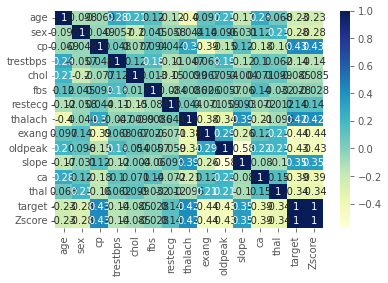

In [ ]:
# SEABORN and data.corr() to plot a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(heart.corr(), annot=True, cmap="YlGnBu")
plt.show()
# Github-> DFE6

Q. Is there any imbalance in the label
?

In [ ]:
# LABEL COLUMN-> Y/value you want to predict
# target column from heart
heart['target'].value_counts()
# Cat = 100, Parrot= 50, Ant= 5
# either no action action required or just del extra rows!

# if one class is less than quarter of the other class,
# the data is imbalanced!
#
# Regression- NO ACTION REQUIRED. 
# Classification (LABEL/Y) - Diagnosis
# 1) Del some of the rows of the larger dataset 
# 2) OR generate FAKE/SIMULATED data 
# 3) Ignore if you want to take a leap of faith in the model

1    165
0    138
Name: target, dtype: int64

In [ ]:
# check variance inflation factor to see the relationship between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=heart.drop(["target"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

    features  vif_Factor
0        age   38.998305
1        sex    3.523211
2         cp    2.414403
3   trestbps   58.557335
4       chol   26.267365
5        fbs    1.268205
6    restecg    2.058206
7    thalach   42.742178
8      exang    2.022527
9    oldpeak    3.062890
10     slope   10.072734
11        ca    1.808925
12      thal   17.165303


In [ ]:
# drop the highest VIF, has to come below 10
# removed variables showing multicollinearity 
# understood from heatmap and VIF
X=heart.drop(["target", "trestbps", "thalach", "age", "chol", "thal"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  features  vif_Factor
0      sex    3.038525
1       cp    2.112149
2      fbs    1.222870
3  restecg    1.957971
4    exang    1.795800
5  oldpeak    2.062440
6    slope    3.756703
7       ca    1.686170


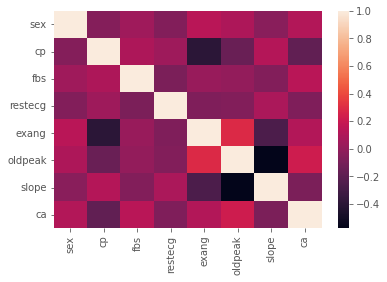

In [ ]:
corr = x.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

Q. Are there any outliers in the dataset? What do you do with them?

In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# NORMALIZE 
# Z-Score = (data-mean)/std (-3,3)
# MinMax -> (data-min)/(max-min) (0,1)

# Detecting Frauds, Anomalies 
# Using Z-Score
import scipy.stats as stats
heart['Zscore'] = stats.zscore(heart["target"])
print(heart.head())
# No Z-Score above or below 3 and -3.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target    Zscore  
0   0     1       1  0.914529  
1   0     2       1  0.914529  
2   0     2       1  0.914529  
3   0     2       1  0.914529  
4   0     2       1  0.914529  


Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

# This does not need to be used

In [ ]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Zscore'],
      dtype='object')

In [ ]:
x = heart.loc[:, ["sex", "cp", "fbs", "restecg", "exang", "oldpeak", "slope", "ca"]]
y = heart.loc[:, ["target"]]
# from this, our objective is to form y = mx + c
# where m and x will be calc by ML
# y and x we will provide to algo!

In [ ]:
# Poor distribution could lead to three things:
# 1. Model overfitting = modeling error in statistics that occurs when a function is too closely aligned to a limited set of data points.
# Models the dataset too well, where it negatively impacts the performance of the model on new data.
# 2. Unrepresentative data sample = training or test datasets are an unrepresentative sample of data from the domain.
# To generalize the model well, it is crucial that the training data be an accurate representation of the population
# 3. Stochastic algorithm = make use of randomness during learning.
# Each time the same algorithm is run on the same data, different random numbers are used, so different models will result.

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# for loop b/w all your models
# xtrain,xtest, ytrain,ytest = train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers

In [ ]:
ytrain

,target
25,1
122,1
35,1
1,1
45,1
...,...
38,1
139,1
266,0
152,1


In [ ]:
# mean and std
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,242.0,0.677686,0.468331,0.0,0.0,1.0,1.0,1.0
cp,242.0,0.962810,1.031989,0.0,0.0,1.0,2.0,3.0
fbs,242.0,0.157025,0.364578,0.0,0.0,0.0,0.0,1.0
restecg,242.0,0.541322,0.531524,0.0,0.0,1.0,1.0,2.0
exang,242.0,0.322314,0.468331,0.0,0.0,0.0,1.0,1.0
oldpeak,242.0,0.997521,1.170272,0.0,0.0,0.6,1.6,6.2
slope,242.0,1.409091,0.626192,0.0,1.0,1.0,2.0,2.0
ca,242.0,0.727273,1.054530,0.0,0.0,0.0,1.0,4.0


In [ ]:
stats = xtrain.describe().T
xmean = stats['mean'] 
xstd = stats['std']
xmean, xstd

(sex        0.677686
 cp         0.962810
 fbs        0.157025
 restecg    0.541322
 exang      0.322314
 oldpeak    0.997521
 slope      1.409091
 ca         0.727273
 Name: mean, dtype: float64, sex        0.468331
 cp         1.031989
 fbs        0.364578
 restecg    0.531524
 exang      0.468331
 oldpeak    1.170272
 slope      0.626192
 ca         1.054530
 Name: std, dtype: float64)

In [ ]:
norm_xtrain = (xtrain - xmean) /xstd
norm_xtest = (xtest - xmean)/ xstd

In [ ]:
norm_xtest.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
192,0.688218,-0.932965,-0.430703,0.862948,-0.688218,0.343919,-0.653300,0.258625
247,0.688218,0.036037,-0.430703,0.862948,1.447023,-0.852383,-0.653300,2.155204
91,0.688218,-0.932965,-0.430703,0.862948,1.447023,-0.852383,0.943655,-0.689665
175,0.688218,-0.932965,-0.430703,-1.018434,1.447023,0.856621,-0.653300,-0.689665
226,0.688218,0.036037,-0.430703,-1.018434,-0.688218,0.343919,-0.653300,0.258625


In [ ]:
ytrain.head()

,target
25,1
122,1
35,1
1,1
45,1


In [ ]:
print(ytrain.tail(10))

     target
24        1
228       0
59        1
128       1
248       0
38        1
139       1
266       0
152       1
5         1


In [ ]:
# Define Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# train
model.fit(norm_xtrain, ytrain)

# testing/scoring
predictions = model.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7540983606557377

In [ ]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
# train
model2.fit(norm_xtrain, ytrain)

# testing/scoring
predictions = model2.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8032786885245902

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(norm_xtrain, ytrain)
  predictions = model.predict(norm_xtest)
  print(accuracy_score(predictions, ytest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.8032786885245902
0.7540983606557377
0.8032786885245902
0.7049180327868853
0.8032786885245902
0.8524590163934426


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
# Best algorithm, highest accuracy score
# Classification, supervised, LinearSVC
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Training the model - default parameters of the class
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [ ]:
# Train and check model accuracy score
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.8264462809917356


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Cross-validation training method to the model and check the training score
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# Predict and accuracy check
ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[23  4]
 [ 5 29]]


In [ ]:
# Create classification report on predicted data
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'